In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers= 2)
test_loader =  torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers= 2)

# **Building a CNN Model**

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1), #(i-f+2p)/s +1  (32-3+2)/1    +1 = 32
        nn.MaxPool2d(kernel_size=2,stride=2),#(M-P)/s + 1   (32-2)/2  + 1 = 16
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.MaxPool2d(kernel_size=2,stride=2),  #(M-P)/s + 1   (16-2)/2   +1  =8
        nn.ReLU()
    )
    self.fc = nn.Sequential(
        nn.Linear(in_features=32*8*8,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=10)
    )

  def forward(self,x):
    x = self.conv(x)
    x = x.view(x.size(0),-1)
    x = self.fc(x)
    return x


model=CNN()

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
import time
start_time = time.time()
loss_list=[]
accuracy_list=[]
for epoch in range(5):
  epoch_loss=0
  for images,labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs,labels)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()

  loss_list.append(epoch_loss/len(train_loader))

  with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in train_loader:
      outputs=model(images)
      _,predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      accuracy = correct/total
      accuracy_list.append(accuracy)

    print('Epoch [{}/50] Training Accuracy: {: .4f}'.format(epoch+1,correct/total),'Loss:{: .4f}'.format(loss_list[-1]))

print('Training took {: .2f}'.format(time.time()-start_time))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/50] Training Accuracy:  0.3279 Loss: 2.0665
Epoch [2/50] Training Accuracy:  0.3580 Loss: 1.7121
Epoch [3/50] Training Accuracy:  0.4341 Loss: 1.5268
Epoch [4/50] Training Accuracy:  0.5031 Loss: 1.4109
Epoch [5/50] Training Accuracy:  0.5399 Loss: 1.3316
Training took  385.67


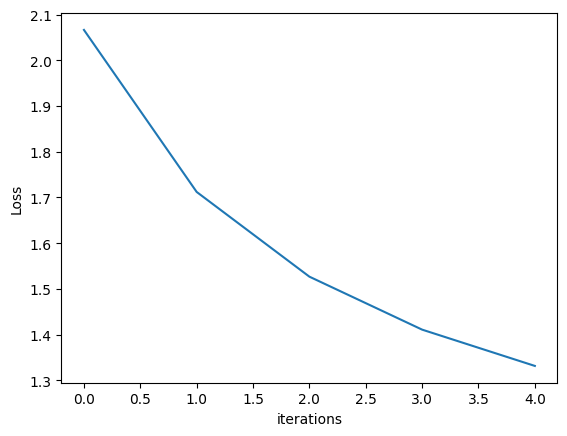

In [ ]:
x= range(5)
plt.plot(x,loss_list)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()

# **Testing**

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_loader:
      outputs=model(images)
      _,predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    print('Test accuracy : {: .4f}'.format(correct/total))

Test accuracy :  0.5318


In [ ]:
from sklearn.metrics import confusion_matrix
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  confusion_matrix = torch.zeros(10,10)
  for images,labels in test_loader:
      outputs=model(images)
      _,predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      for i,j in zip(predicted,labels):
        confusion_matrix[i][j] += 1
confusion_matrix=confusion_matrix.numpy().astype(int)
print('Confusion Matrix')
print(confusion_matrix)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Confusion Matrix
[[567  19 102  32  45  15  10  23 110  18]
 [ 56 698  26  28  16  11  16  12  88 156]
 [ 42   7 330  66 125  73  58  26   6   9]
 [  9   4  43 246  43  86  53  39   9  10]
 [  4   2 108  52 344  40  55  49   5   4]
 [ 13   7 133 270  96 555  51 105  12   6]
 [ 19   5 109 104 144  56 637  43   2  14]
 [ 18   5  68  74 123  97  37 575   8  16]
 [147  39  32  25  26  22   7  12 652  53]
 [125 214  49 103  38  45  76 116 108 714]]
